In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster  import KMeans
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()['data']
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

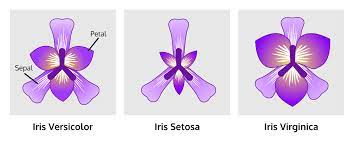

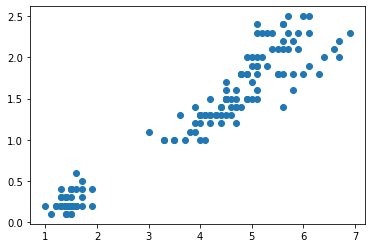

In [3]:
#X, y   =  make_blobsa(n_samples=400, centers=4, n_features=2)
df     =  pd.DataFrame(iris[:, [2,3]],  columns=['x', 'y'])
plt.scatter(df.x, df.y) 

<font size='4' color='blue'>
maximize the distance between clusters; and minimize the distance between datapoints in a cluster
</font>

# WCSS is the sum of squared distance between each point and the centroid in a cluster.

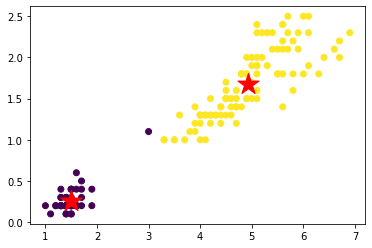

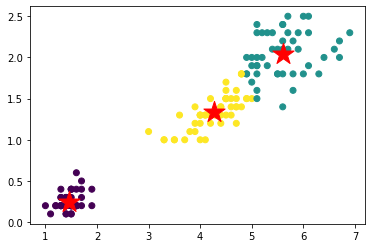

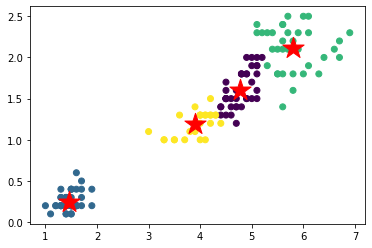

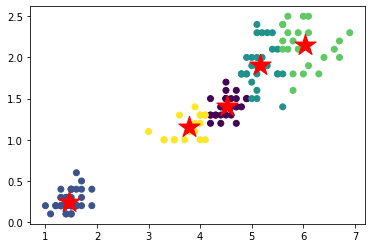

In [9]:
sklearn_inertia = []
for i in range(2,6) :
    model = KMeans(n_clusters=i)
    model.fit(df[['x', 'y']])
    plt.scatter(df.x, df.y, c=model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=500, marker='*', c='r')
    plt.show()
    sklearn_inertia.append((i,model.inertia_))


In [10]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['x', 'y'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 0.00018363177777777783,
 '_algorithm': 'lloyd',
 '_n_threads': 8,
 'cluster_centers_': array([[4.5137931 , 1.4137931 ],
        [1.462     , 0.246     ],
        [5.15172414, 1.90689655],
        [6.02608696, 2.14782609],
        [3.77368421, 1.15263158]]),
 '_n_features_out': 5,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
        0, 4, 0, 4, 2, 4, 0, 0, 0, 0, 0, 2, 0, 4, 4, 4, 4, 2, 0, 0, 0, 0,
        4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 3, 2, 3, 2, 3, 3, 0, 3, 3, 3,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3

In [5]:
sklearn_inertia

[(2, 86.39021984551395),
 (3, 31.371358974358976),
 (4, 19.477123363965468),
 (5, 13.91690875790876)]

In [ ]:
# Elbow Method for determining the optimum number of clusters 

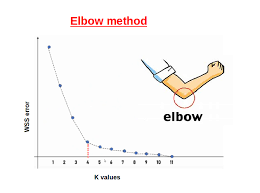


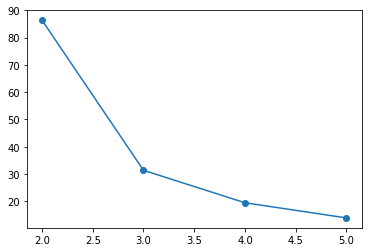

In [6]:
inert = np.array(sklearn_inertia)
plt.plot(inert[:,0], inert[:,1], marker='o')

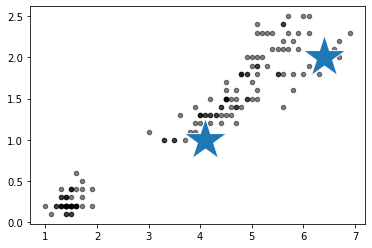

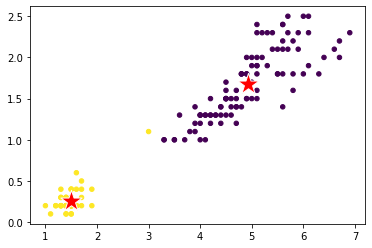

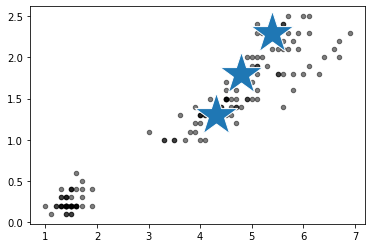

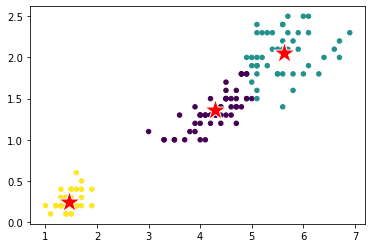

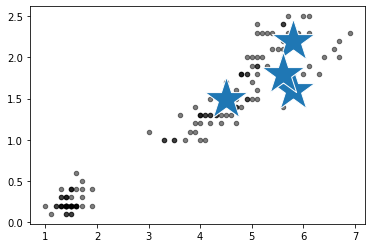

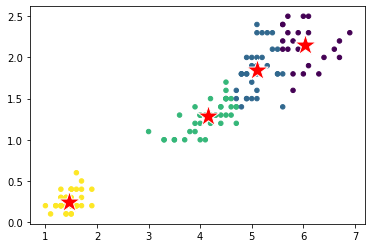

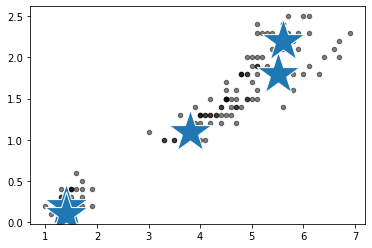

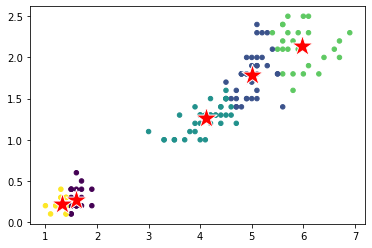

[[ 2.         86.39021985]
 [ 3.         31.41288567]
 [ 4.         20.2996078 ]
 [ 5.         19.33290842]]


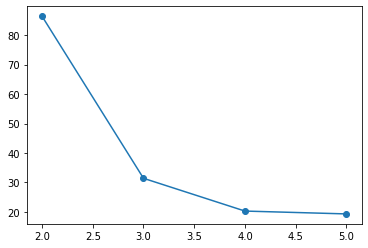

In [8]:
my_inertia = []
df1 = df.copy()
for ctr in range(2,6) :
    
    df1.loc[:, 'grp'] = 0
    centroids = df1.sample(ctr)[['x','y']].reset_index(drop=True)
    centroids_old = centroids.copy()
    plt.scatter(df1.x, df1.y, c='k', alpha=.5, s=20)
    plt.scatter(centroids.x, centroids.y, marker='*', edgecolor='w', s=2000)
    plt.show()
    while True :
        dist = []
        for i in range(ctr) :
            dist.append( np.sqrt( (df1.x - centroids.loc[i,'x'])**2 +  (df1.y -  centroids.loc[i,'y'])**2))
        df1['grp']  =  np.argmin(dist, axis=0)
        centroids = df1.groupby(['grp'])[['x', 'y']].mean().reset_index(drop=True)
        if centroids.equals(centroids_old) :
            break
        else :
            centroids_old = centroids.copy()
    plt.scatter(df1.x, df1.y, c=df1.grp, s=20)
    plt.scatter(centroids.x, centroids.y, marker='*', c='r', edgecolor='w', s=500)
    plt.show()
    all_wcss = 0
    for j in range(len(centroids)) : 
        wcss = sum((df1.loc[df1.grp==j].x - centroids.loc[j].x)**2 +  (df1.loc[df1.grp==j].y - centroids.loc[j].y)**2)
        all_wcss = all_wcss + wcss
    my_inertia.append((ctr, all_wcss))  
my_inert = np.array(my_inertia)
print(my_inert)
plt.plot(my_inert[:, 0], my_inert[:, 1], marker='o')

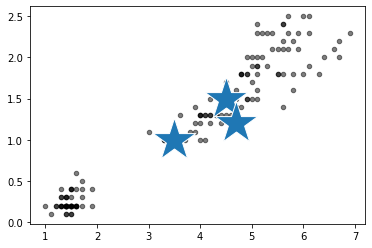

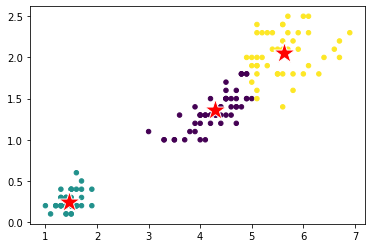

In [22]:
df1 = df.copy()
for ctr in range(3,4) :
    
    df1.loc[:, 'grp'] = 0
    centroids = df1.sample(ctr)[['x','y']].reset_index(drop=True)
    centroids_old = centroids.copy()
    plt.scatter(df1.x, df1.y, c='k', alpha=.5, s=20)
    plt.scatter(centroids.x, centroids.y, marker='*', edgecolor='w', s=2000)
    plt.show()
    while True :
        dist = []
        for i in range(ctr) :
            dist.append( np.sqrt( (df1.x - centroids.loc[i,'x'])**2 +  (df1.y -  centroids.loc[i,'y'])**2))
        df1['grp']  =  np.argmin(dist, axis=0)
        centroids = df1.groupby(['grp'])[['x', 'y']].mean().reset_index(drop=True)
        if centroids.equals(centroids_old) :
            break
        else :
            centroids_old = centroids.copy()
    plt.scatter(df1.x, df1.y, c=df1.grp, s=20)
    plt.scatter(centroids.x, centroids.y, marker='*', c='r', edgecolor='w', s=500)
    plt.show()
